## Text Analysis - Assignment 2
## Xue (Tracy) Feng
## Sep 15, 2022

##### Vectorizing and analyzing text of customer reviews

A well-known peanut company (Nutpea, Inc.) has long struggled to understand its customers. Recently, the company collected reviews of its product to understand what people like and don't like about their products and enlisted you as a consultant to help analyze the results. The dataset provided to you includes only positive (4 or 5 stars) and negative (1 or 2 stars) reviews, not neutral reviews.

You should prepare a Jupyter notebook that contains all necessary code as well as Markdown text to explain each question and step of the process below, how it works, and what is happening. You will save the notebook as an HTML report and submit it to Canvas. The script should run without errors. You should use tables and/or visualizations to show your results. 

### Question 1

##### Read in the peanuts_reviews.csv  Download peanuts_reviews.csvdataset. How many reviews are there? What percentage of the reviews are positive (4 or 5) and what percentage are negative (1 or 2) reviews?

In [1]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv("peanuts_reviews.csv", sep = ',')

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   493 non-null    int64 
 1   text     493 non-null    object
 2   summary  493 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.7+ KB


In [4]:
len(d[(d.rating == 4) | (d.rating == 5)]) / len(d)

0.6774847870182555

In [5]:
len(d[(d.rating == 1) | (d.rating == 2)]) / len(d)

0.3225152129817444

From the results above, there are 493 reviews. 67.8% are positive, and 32.3% are negative.

### Question 2
##### Generate a two wordclouds: one for good reviews and one for bad reviews. Provide a short (2-3 sentences) explanation of what the wordcloud does and any noteworthy insights we can see.

In [6]:
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

A helper function to display a wordcloud.

In [7]:
def word_cloud_generator(s):
    wordcloud = WordCloud(background_color="white", width = 1000, height = 500).generate(s)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

A helper function to generate a list of words with punctuations removed

In [8]:
def single_word_generator(d):
    # initialize a new set to store all the single words from positive text reviews
    all_words = []
    for column_name, s in d.iteritems():
        # remove punctuations of the current sentence
        new_s = re.sub(r'[^\w\s]', "", s)
        # split the current sentence
        temp_res = new_s.split()
        # append each word to the list
        for w in temp_res:
            all_words.append(w)
    return all_words

A wordcloud for good reviews

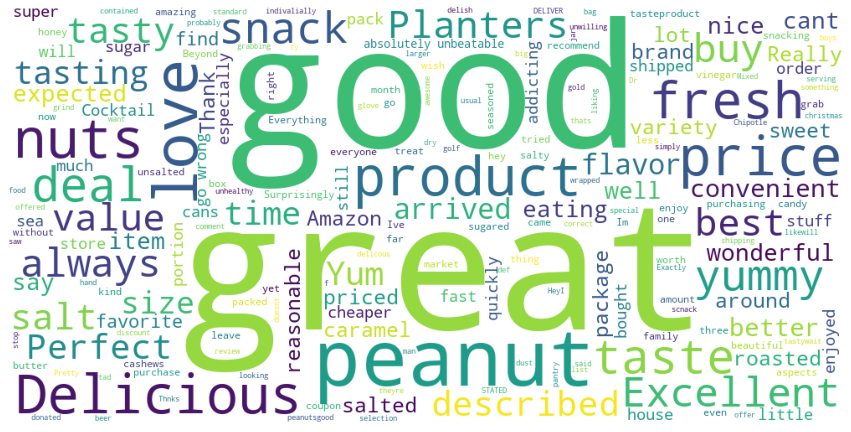

In [9]:
d_pos = d[(d.rating == 4) | (d.rating == 5)]["text"]
pos_list = single_word_generator(d_pos)
str_pos = (" ").join(pos_list)
word_cloud_generator(str_pos)

A wordcloud for bad reviews

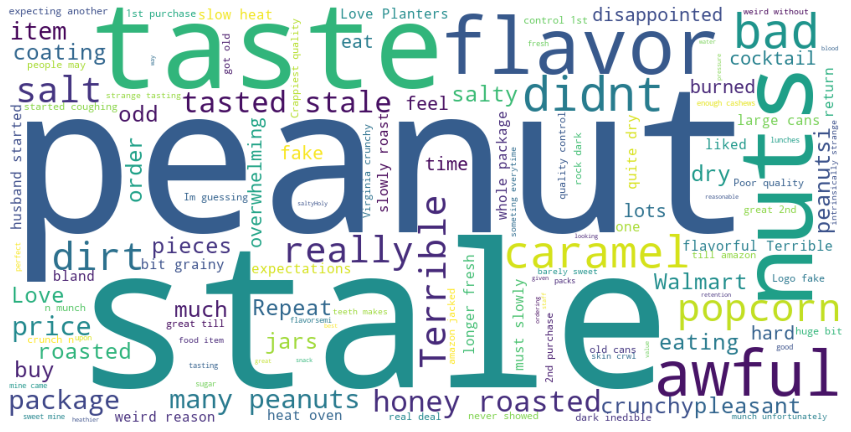

In [10]:
d_neg = d[(d.rating == 1) | (d.rating == 2)]["text"]
neg_list = single_word_generator(d_neg)
str_neg = (" ").join(neg_list)
word_cloud_generator(str_neg)

A word cloud is a visual representation of data. The words or phrases are visualized from large/ bold to small/ light by the frequency of them. The higher the frequency, the larger/ bolder the word shown in a wordcloud. From the first wordcloud with good reviews, we know most customers comment the peanut is delicious, price is relative cheap, fresh, and fast to eat. From the second wordcloud with bad reviews, we found the reason they give bad reviews are the peanut is stale, dry, salty, and with dirt. The company might need to pay attention on the quality control (especially at Walmart) to make sure all peanuts are fresh and clean.

### Question 3
##### Using scikit-learn's CountVectorizer, what are top five most frequent single words (unigrams) used in positive reviews? What are top five most frequent single words used in negative reviews? (For questions 3-5, exclude the default English stopwords from scikit-learn's vectorizer)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

a helper function for getting n-grams

In [12]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

top five most frequent single words (unigrams) used in positive reviews

In [13]:
unigrams = get_ngrams(d_pos, ngram_from=1, ngram_to=1, n=5)
unigrams_df = pd.DataFrame(unigrams)
unigrams_df.columns=["Unigram", "Frequency"]
unigrams_df.head()

,Unigram,Frequency
0,great,88
1,good,84
2,peanuts,46
3,love,26
4,product,24


top five most frequent single words (unigrams) used in negative reviews

In [14]:
unigrams_neg = get_ngrams(d_neg, ngram_from=1, ngram_to=1, n=5)
unigrams_neg_df = pd.DataFrame(unigrams_neg)
unigrams_neg_df.columns=["Unigram", "Frequency"]
unigrams_neg_df.head()

,Unigram,Frequency
0,peanuts,38
1,stale,37
2,like,28
3,taste,24
4,nuts,20


### Question 4
##### Using scikit-learn's CountVectorizer, what are top five most frequent single words (unigrams) used in positive reviews? What are top five most frequent single words used in negative reviews? (For questions 3-5, exclude the default English stopwords from scikit-learn's vectorizer)

top five most frequent two word phrases used in positive reviews

In [15]:
two_grams = get_ngrams(d_pos, ngram_from=2, ngram_to=2, n=10)
two_grams_df = pd.DataFrame(two_grams)
two_grams_df.columns=["Two_grams", "Frequency"]
two_grams_df.head()

,Two_grams,Frequency
0,great price,9
1,good price,7
2,great value,7
3,great product,6
4,good product,6


top five most frequent two word phrases used in negative reviews

In [16]:
two_grams_neg = get_ngrams(d_neg, ngram_from=2, ngram_to=2, n=10)
two_grams_neg_df = pd.DataFrame(two_grams_neg)
two_grams_neg_df.columns=["Two_grams", "Frequency"]
two_grams_neg_df.head()

,Two_grams,Frequency
0,terrible taste,8
1,like dirt,8
2,honey roasted,7
3,tasted stale,7
4,buy walmart,4


### Question 5
##### Create two plots: one with the 10 most common two word phrases used in negative reviews and their frequencies (order the phrases by frequency) and one with the 10 most common two word phrases used in positive reviews and their frequencies (order the phrases by frequency). Write a short explanation (8-10 sentences) of what insights the company can take away from the plots and answer at least the following questions:

###### A. What aspects of the product are positive reviewers mentioning? What are the negative reviewers mentioning?
###### B. Do the results indicate indicate that unsatisfied customers are most unhappy with product prices, quality, variety, or something else?
###### C. What is one actionable insight that a manager should takeaway from your analysis?

10 most common two word phrases used in negative reviews

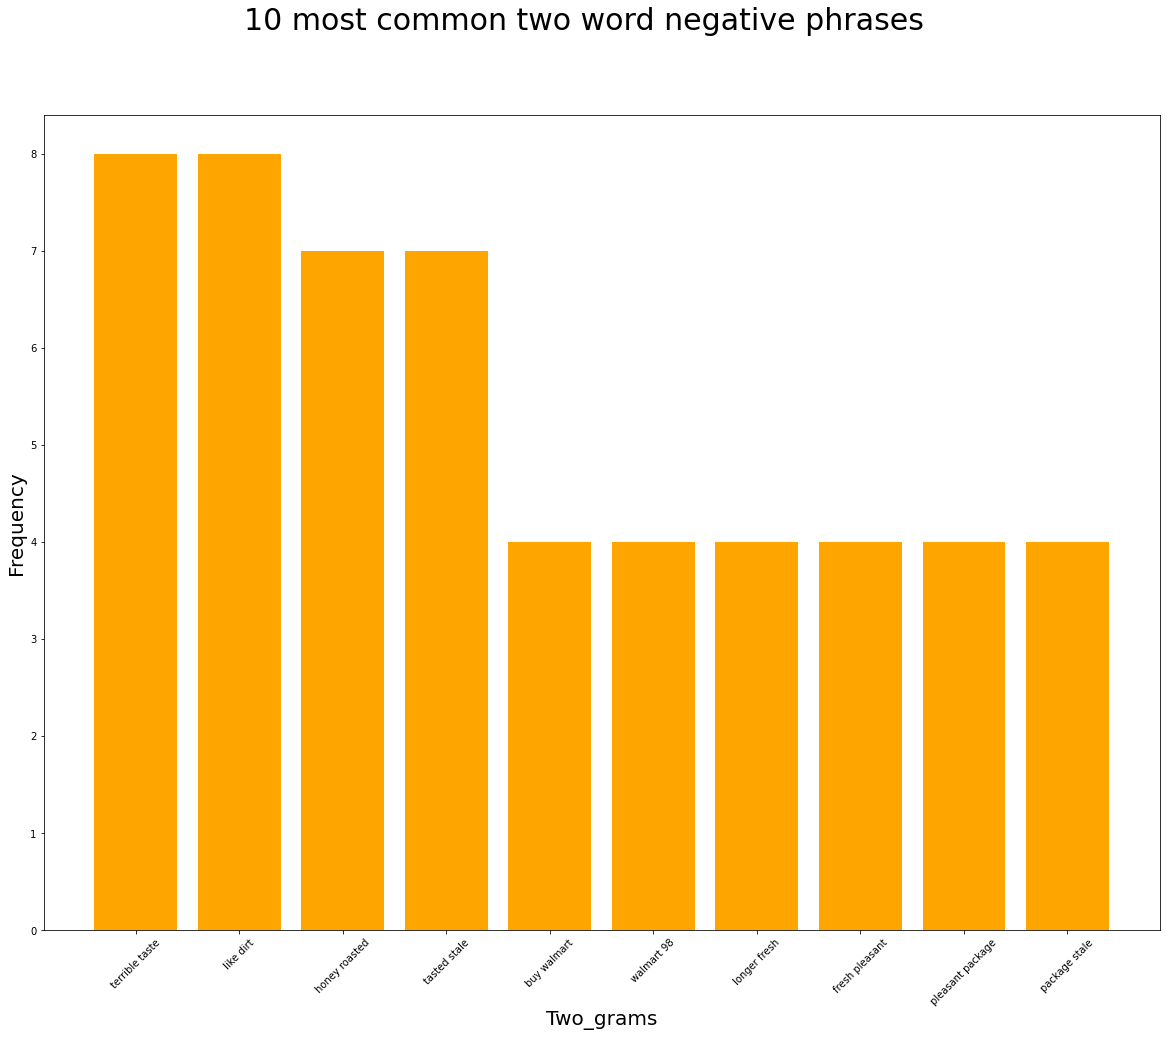

In [17]:
plt.bar('Two_grams', 'Frequency', data=two_grams_neg_df, color='orange')
plt.gcf().set_size_inches(20, 15)
plt.xticks(rotation=45)
plt.suptitle('10 most common two word negative phrases', fontsize=30)
plt.xlabel('Two_grams', size=20)
plt.ylabel('Frequency', size=20)
plt.rcParams.update({'font.size': 20})
plt.show()

10 most common two word phrases used in positive reviews

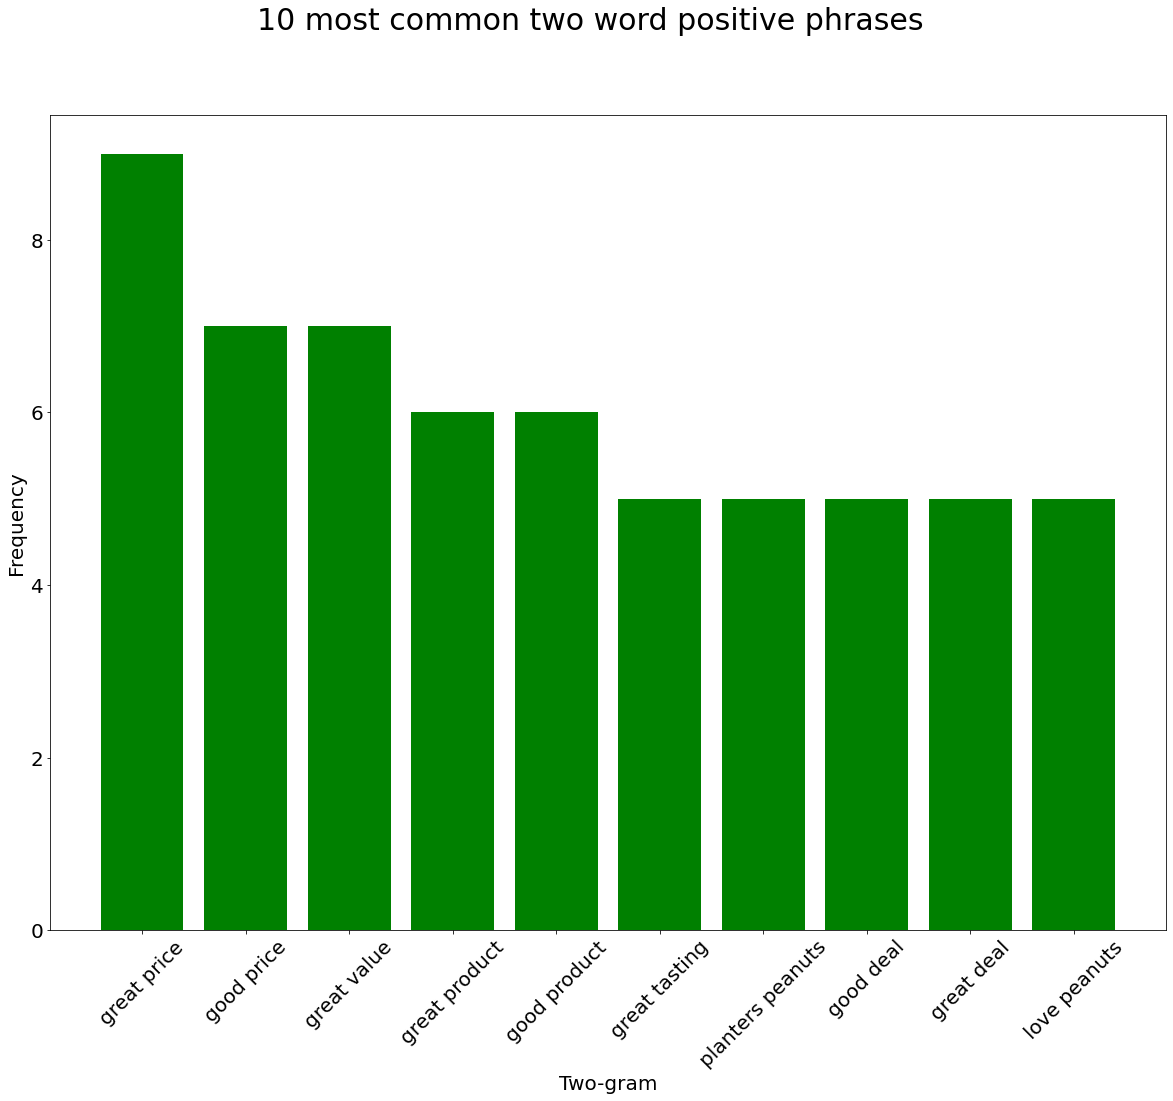

In [18]:
plt.bar('Two_grams', 'Frequency', data=two_grams_df, color='green')
plt.gcf().set_size_inches(20, 15)
plt.xticks(rotation=45)
plt.suptitle('10 most common two word positive phrases', fontsize=30)
plt.xlabel('Two-gram', size=20)
plt.ylabel('Frequency', size=20)
plt.rcParams.update({'font.size': 20})
plt.show()

A. Positive reviewers mention about the product has good price, good value, and is tasty, and mention that they are peanuts lover. Negative reviewers mention about the peanut tastes awful. It is like dirt and is stale. They also mentioned about Walmart and honey roasted flavored so an educated guess would be the products sold in Walmart with honey roasted flavor are particularly aweful.

B. From the result the unsatisfied customers are most unhappy about the product quality as they do not mention the price but mention many quality-related issues.

C. The manager should pay attention on the freshness of the product, as well as the products sold in Walmart and with honey roasted flavor.

### Question 6
##### Create a user-defined function that takes a dataframe, instantiates a vectorizer with a custom n-gram range with minimum and maximum set to 1 as default but that can be adjusted as an input to the function, that vectorizes that text column of the dataframe, converts the sparse arrays to dense arrays, sums the frequencies of the terms, sorts the results by the count and keeps only the top n number of results where n is a parameter in the function that is 10 by default but can be adjusted, and returns a plot of the results (using a visualization package of your choice). The function should take four arguments.

In [19]:
def plot_frequency(df, ngram_min=1, ngram_max=1, n=10):
    
    n_grams = get_ngrams(df, ngram_from=ngram_min, ngram_to=ngram_max, n=n)
    n_grams_df = pd.DataFrame(n_grams)
    n_grams_df.columns=["Grams", "Frequency"]
    n_grams_df = n_grams_df.sort_values("Frequency", ascending=True)
    plt.barh('Grams', 'Frequency', data=n_grams_df, color='grey')
    plt.gcf().set_size_inches(20, 15)
    plt.xlabel('Frequency', size=20)
    plt.ylabel('Grams', size=20)
    plt.rcParams.update({'font.size': 20})
    return plt.show()

### Question 7
##### Use the function you created in question 6 to generate a plot with the seven most frequent three-word phrases used in positive reviews of the peanuts with the phrases on the y-axis and the frequencies on the x-axis, ordered in descending order of frequencies from top to bottom. Note: this should be done in one line of code.

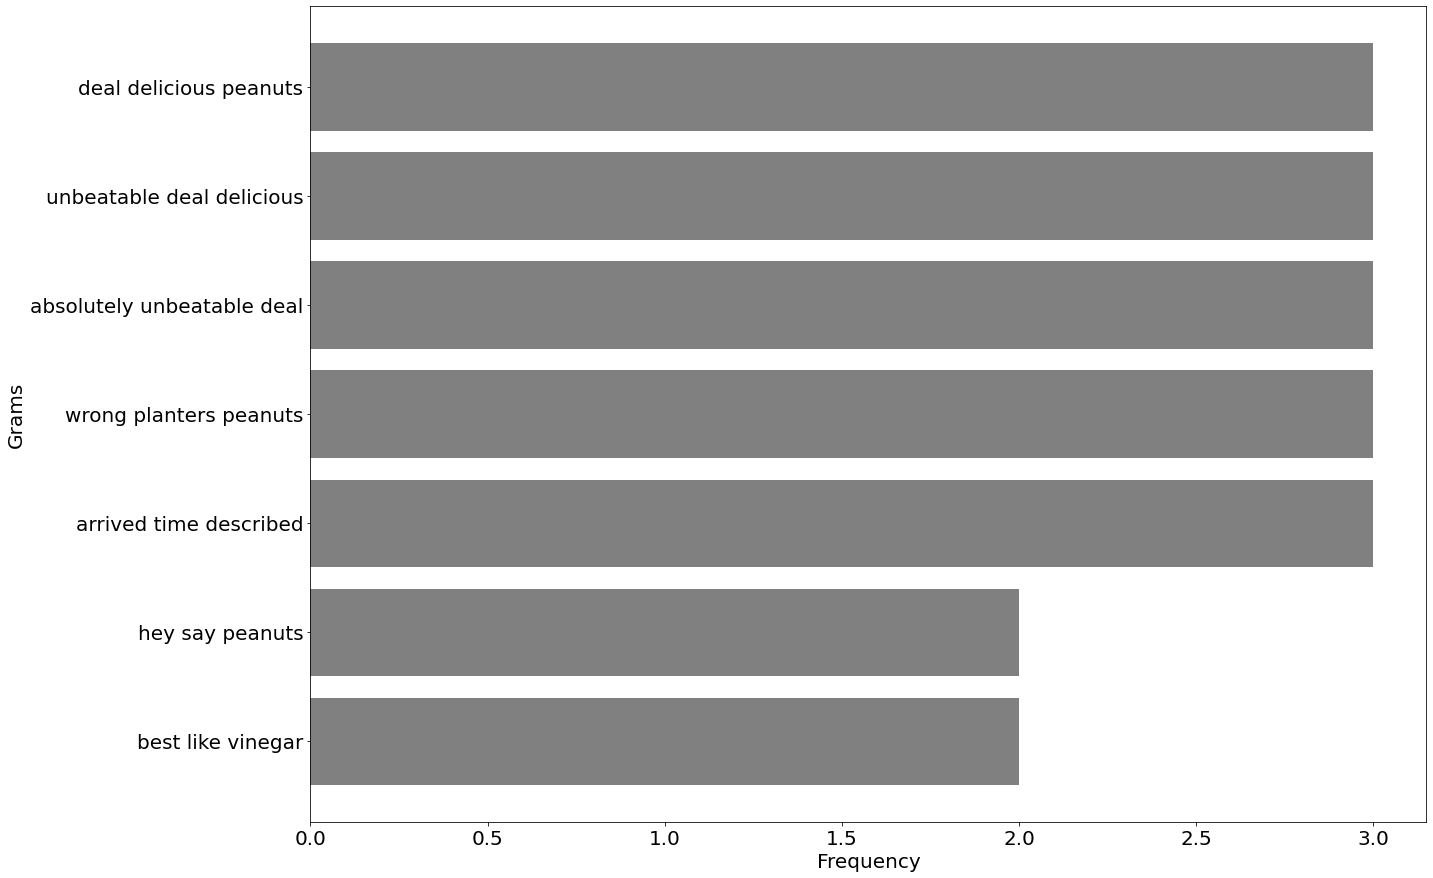

In [20]:
plot_frequency(d[(d.rating == 4) | (d.rating == 5)]["text"], 3, 3, 7)